In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loan/loan.xlsx


In [161]:
df =pd.read_excel("/kaggle/input/bank-loan/loan.xlsx")

In [162]:
import warnings
warnings.filterwarnings('ignore')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [164]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

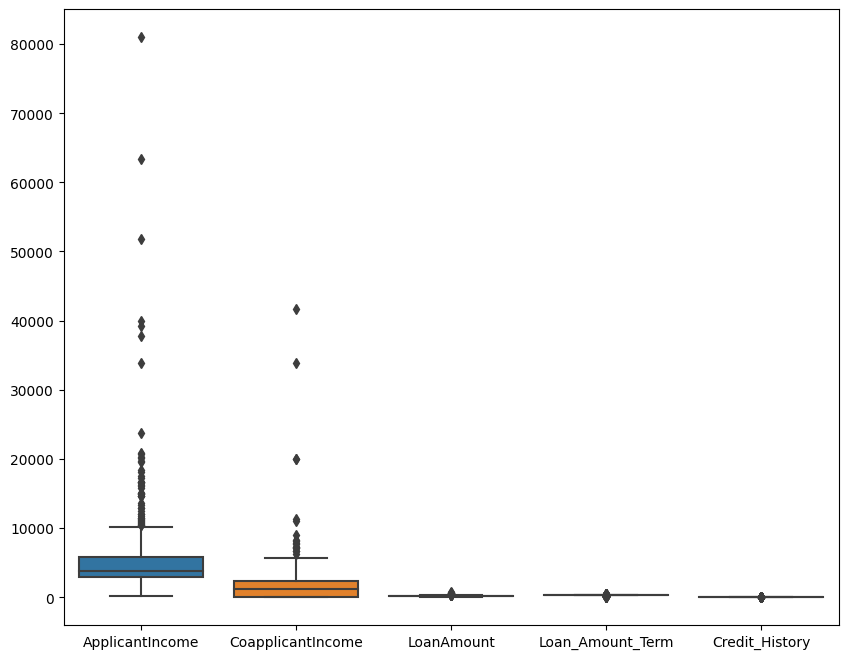

In [86]:
fig=plt.figure(figsize=(10,8))
sns.boxplot(df)

In [87]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='total_income_log', ylabel='Density'>

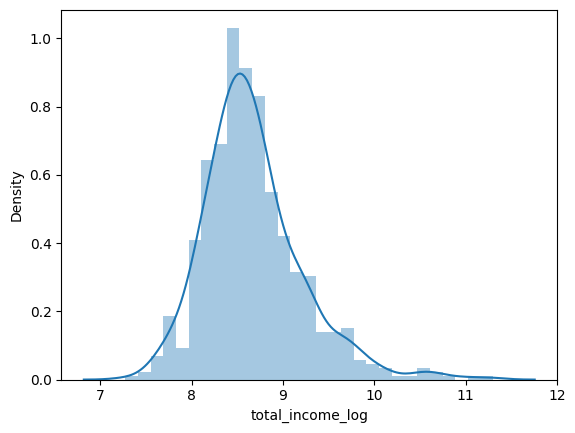

In [88]:
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['total_income_log']=np.log(df['total_income'])
# df['total_income'].hist(bins=20)
sns.distplot(df['total_income_log'])

In [89]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
# df['LoanAmount_log']=df['LoanAmount_log'].fillna(df['LoanAmount_log'].median())

df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [90]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
total_income         0
total_income_log     0
dtype: int64

In [91]:
# X=df.iloc[:,np.r_[1:5,9:11,13:15]].values
# y=df.iloc[:,12].values

Number of people who has taken loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

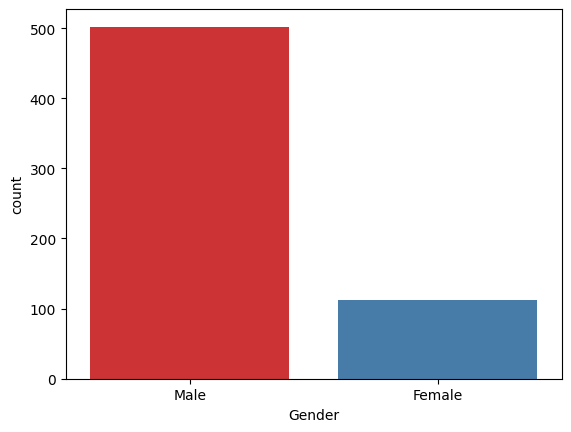

In [92]:
print('Number of people who has taken loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x=df['Gender'],data=df,palette='Set1')

Number of people who has taken loan by Marrital Status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

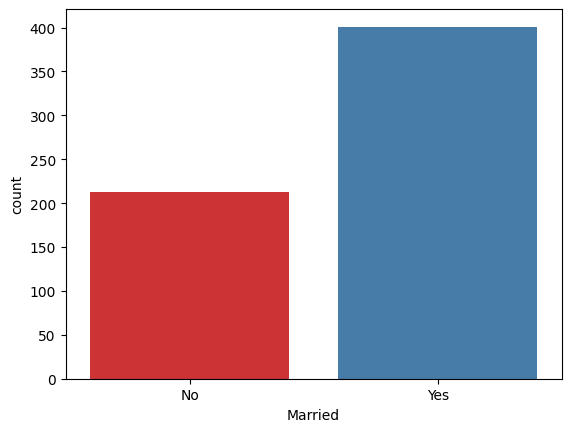

In [93]:
print('Number of people who has taken loan by Marrital Status')
print(df['Married'].value_counts())
sns.countplot(x=df['Married'],data=df,palette='Set1')

Number of people who has taken loan by Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

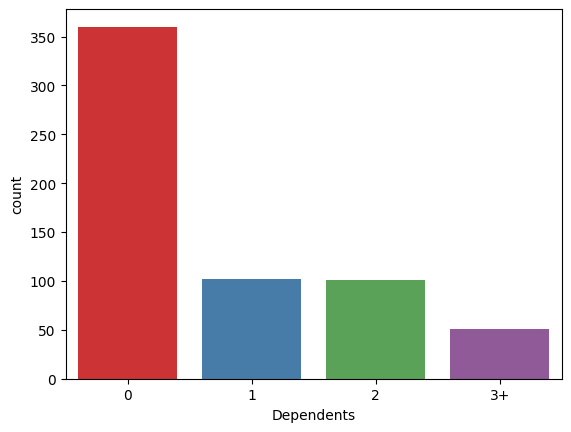

In [94]:
print('Number of people who has taken loan by Dependents')
print(df['Dependents'].value_counts())
sns.countplot(x=df['Dependents'],data=df,palette='Set1')

Number of people who has taken loan as by Self Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

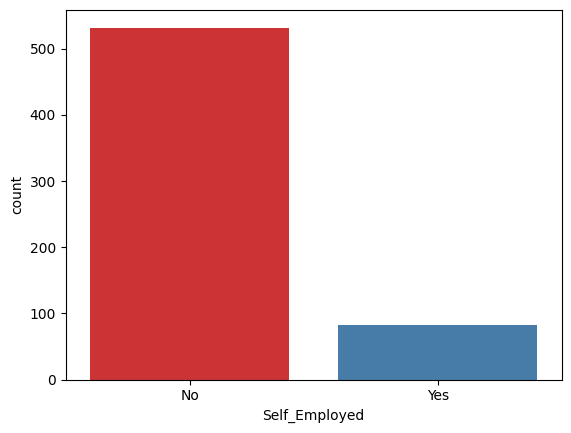

In [95]:
print('Number of people who has taken loan as by Self Employed')
print(df['Self_Employed'].value_counts())
sns.countplot(x=df['Self_Employed'],data=df,palette='Set1')

Number of people who has taken loan by Loan Amount
LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


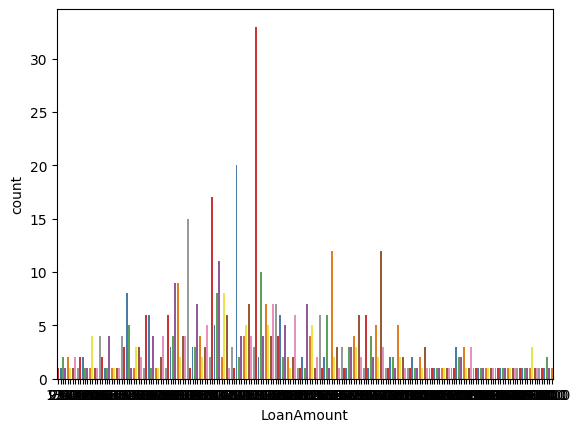

In [96]:
print('Number of people who has taken loan by Loan Amount')
print(df['LoanAmount'].value_counts())
sns.countplot(x=df['LoanAmount'],data=df,palette='Set1')
plt.show()

Number of people who has taken loan as group by Credit History
Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

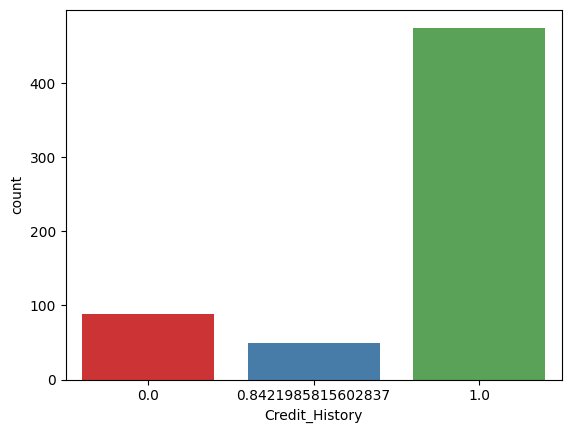

In [97]:
print('Number of people who has taken loan as group by Credit History')
print(df['Credit_History'].value_counts())
sns.countplot(x=df['Credit_History'],data=df,palette='Set1')

In [98]:
corr_mat=df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
corr_mat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income,total_income_log
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477,0.893037,0.717829
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665,0.342781,0.383827
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031,0.620316,0.687825
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395,-0.069830,-0.055320
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000,-0.014447,0.019156
total_income,0.893037,0.342781,0.620316,-0.069830,-0.014447,1.000000,0.852873
total_income_log,0.717829,0.383827,0.687825,-0.055320,0.019156,0.852873,1.000000


<Figure size 1000x800 with 0 Axes>

<Axes: >

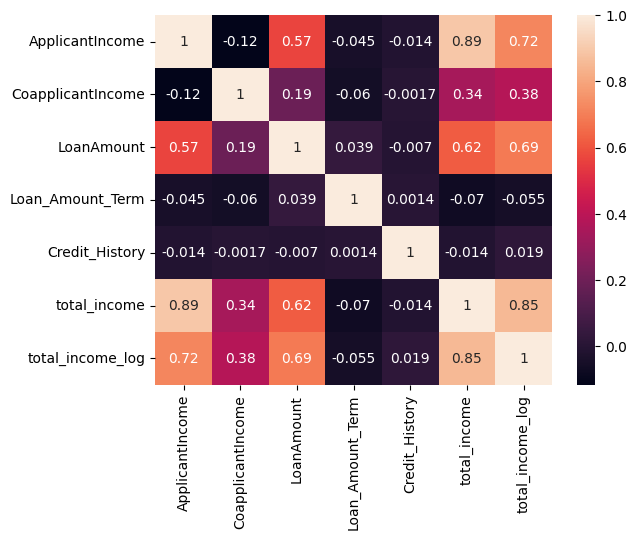

In [99]:
sns.heatmap(corr_mat,annot=True)

<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

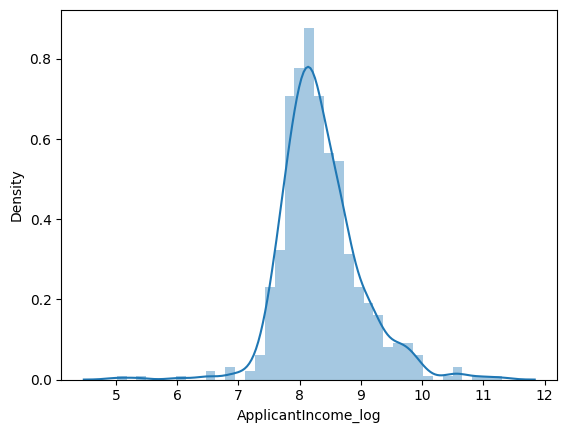

In [100]:
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome_log'])

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

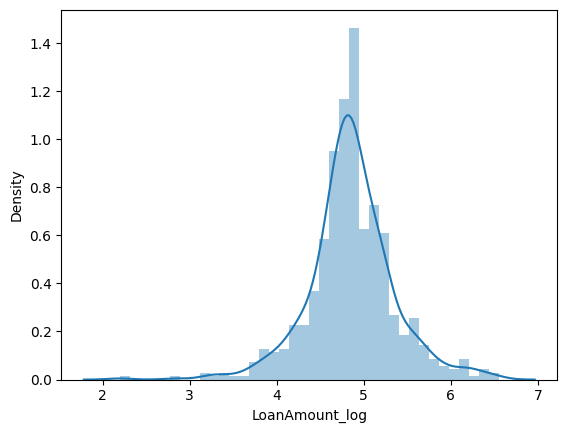

In [101]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_log'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

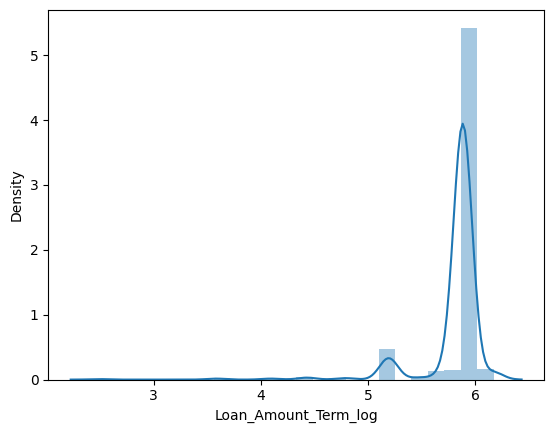

In [102]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_log'])

In [103]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674026,8.674026,4.852030,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568,8.430109,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,8.006368,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323,7.856707,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,8.699515,4.948760,5.886104


## drop unnecessary columns

In [104]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','total_income','Loan_ID']
df=df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026,4.852030,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515,4.948760,5.886104


## next task is to convert categorical val to numerical

In [114]:
df['Dependents'] = df['Dependents'].astype(str)

In [115]:
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
cols=['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']

for col in cols:
    df[col]=le.fit_transform(df[col])

In [116]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026,4.852030,5.886104
1,1,1,1,0,0,1.0,0,0,8.714568,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,8.505323,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515,4.948760,5.886104


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int64  
 1   Married               614 non-null    int64  
 2   Dependents            614 non-null    int64  
 3   Education             614 non-null    int64  
 4   Self_Employed         614 non-null    int64  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    int64  
 7   Loan_Status           614 non-null    int64  
 8   total_income_log      614 non-null    float64
 9   ApplicantIncome_log   614 non-null    float64
 10  LoanAmount_log        614 non-null    float64
 11  Loan_Amount_Term_log  614 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


## split dependent and independent feature

In [123]:
X=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [124]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,total_income_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,0,0,0,0,1.0,2,8.674026,8.674026,4.852030,5.886104
1,1,1,1,0,0,1.0,0,8.714568,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.0,2,8.006368,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,8.505323,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.0,2,8.699515,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972466,7.972466,4.262680,5.886104
610,1,1,3,0,0,1.0,0,8.320205,8.320205,3.688879,5.192957
611,1,1,1,0,0,1.0,2,9.025456,8.996157,5.533389,5.886104
612,1,1,2,0,0,1.0,2,8.933664,8.933664,5.231109,5.886104


In [125]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 1.Logistic Regression

In [134]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy*100)

78.86178861788618


## Accuracy is the ratio of correctly predicted values to the total prediction

In [139]:
score=cross_val_score(lr,X,y,cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [160]:
print(np.mean(score)*100)

70.19192323070772


#  2.Decision Tree Classifier

In [159]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy*100

68.29268292682927

In [158]:
score=cross_val_score(dtc,X,y,cv=5)
print(score)
print(f"mean score : {np.mean(score)*100}")

[0.65853659 0.69918699 0.69918699 0.77235772 0.68032787]
mean score : 70.19192323070772


# 3.Random Forest

In [157]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy*100

78.04878048780488

In [156]:
score=cross_val_score(rfc,X,y,cv=5)
print(score)
print(f"mean score : {np.mean(score)*100}")

[0.78861789 0.76422764 0.76422764 0.80487805 0.78688525]
mean score : 78.17672930827669


# 4.KNN

In [153]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.7154471544715447

In [155]:
score=cross_val_score(knn,X,y,cv=5)
print(score)
print(f"mean score : {np.mean(score)*100}")

[0.77235772 0.74796748 0.73170732 0.76422764 0.75409836]
mean score : 75.40717046514726
